In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import zipfile

#### Load the UCI Bank Marketing Dataset

In [3]:
'''
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
zip_ref = zipfile.ZipFile('bank-additional.zip', 'r')
zip_ref.extractall('')
zip_ref.close()
'''

"\n!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip\nzip_ref = zipfile.ZipFile('bank-additional.zip', 'r')\nzip_ref.extractall('')\nzip_ref.close()\n"

In [4]:
# Load the CSV file into a pandas DataFrame
bank_dataframe = pd.read_csv('bank-additional/bank-additional-full.csv', delimiter=';')
print(bank_dataframe.shape)
bank_dataframe.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Select features from the DataFrame
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',  'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)
bank_dataframe.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,nonexistent,no
1,57,services,married,high.school,unknown,no,no,1,999,nonexistent,no
2,37,services,married,high.school,no,yes,no,1,999,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,1,999,nonexistent,no
4,56,services,married,high.school,no,no,yes,1,999,nonexistent,no


In [6]:
 print(bank_dataframe['job'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [7]:
# Replacing null values with most frequent value
# Now we are imputing those 2 Missing Values with the Most Frequent value in the num-of-doors column using pandas fillna() method.
categorical_features = ['default', 'housing', 'job', 'loan', 'education',  'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = bank_dataframe[feature].fillna(bank_dataframe[feature].value_counts().index[0])
bank_dataframe.shape

(41188, 11)

In [8]:
# there are several approaches to encode catagroical variables and some of them are discussed in here:
#https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
# Convert the categorical features in the DataFrame to one-hot encodings
from sklearn.preprocessing import LabelBinarizer
#!pip install category_encoders

import category_encoders as ce
#encoder = LabelBinarizer()

for feature in categorical_features:
    encoder = ce.BinaryEncoder(cols = [feature])

    df = encoder.fit_transform(bank_dataframe[feature])
    bank_dataframe = pd.concat([bank_dataframe,df], axis =1)
    bank_dataframe = bank_dataframe.drop(columns = [feature])

bank_dataframe.head()

C:\Users\danie\anaconda3\envs\ml\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\danie\anaconda3\envs\ml\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\danie\anaconda3\envs\ml\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\danie\anaconda3\envs\ml\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\danie\anaconda3\env

,age,marital,campaign,pdays,y,default_0,default_1,default_2,housing_0,housing_1,...,loan_0,loan_1,loan_2,education_0,education_1,education_2,education_3,poutcome_0,poutcome_1,poutcome_2
0,56,married,1,999,no,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,57,married,1,999,no,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,37,married,1,999,no,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
3,40,married,1,999,no,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
4,56,married,1,999,no,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [9]:
# Shuffle the DataFrame
bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)
bank_dataframe

,age,marital,campaign,pdays,y,default_0,default_1,default_2,housing_0,housing_1,...,loan_0,loan_1,loan_2,education_0,education_1,education_2,education_3,poutcome_0,poutcome_1,poutcome_2
0,40,single,4,999,no,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,41,married,1,999,no,0,0,1,0,1,...,0,1,0,0,1,1,1,0,0,1
2,37,married,5,4,yes,0,0,1,0,1,...,0,0,1,0,1,1,1,0,1,1
3,33,married,1,999,no,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,32,married,2,999,no,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,29,married,3,999,no,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
41184,37,divorced,5,999,no,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
41185,28,single,1,6,yes,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
41186,30,married,6,999,no,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [10]:
bank_dataframe = bank_dataframe[bank_dataframe['marital'] != 'divorced'] 

bank_dataframe = bank_dataframe.drop(columns = ['marital'])
# Convert the label ('y') to an integer instead of 'yes' or 'no'
y_val = {'yes': 1,'no': 0}

bank_dataframe.y = [y_val[item] for item in bank_dataframe.y]

bank_dataframe.head()

,age,campaign,pdays,y,default_0,default_1,default_2,housing_0,housing_1,housing_2,...,loan_0,loan_1,loan_2,education_0,education_1,education_2,education_3,poutcome_0,poutcome_1,poutcome_2
0,40,4,999,0,0,1,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
1,41,1,999,0,0,0,1,0,1,0,...,0,1,0,0,1,1,1,0,0,1
2,37,5,4,1,0,0,1,0,1,0,...,0,0,1,0,1,1,1,0,1,1
3,33,1,999,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,32,2,999,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


#### Create the Dataset object



In [11]:
target = bank_dataframe.pop('y')


In [12]:
bank_dataset = tf.data.Dataset.from_tensor_slices((bank_dataframe.values, target.values))
bank_dataset.element_spec

(TensorSpec(shape=(24,), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [13]:
#bank_dataset = tf.data.Dataset.from_tensor_slices(dict(bank_dataframe))
#bank_dataset.element_spec

#### Split into a training and a validation set

In [14]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

36576


In [15]:
# Make training and validation sets from the dataset
train_len = int(0.7 * dataset_length)
train_data = bank_dataset.take(train_len)
val_data_ = bank_dataset.skip(train_len)

In [16]:
dataset_length = 0
for _ in val_data_:
    dataset_length += 1
print(dataset_length)


# Make training and validation sets from the dataset
val_len = int(0.5 * dataset_length)
test_data = val_data_.take(val_len)
val_data = val_data_.skip(val_len)

10973


#### Build a classification model

Now let's build a model to classify the features.

In [17]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(24,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [18]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Show the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 24)                96        
_________________________________________________________________
dense (Dense)                (None, 400)               10000     
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 174,097
Trainable params: 172,449
Non-trainable params: 1,648
______________________________________________

#### Train the model

In [20]:
# Create batched training and validation datasets

train_data = train_data.batch(batch_size=20, drop_remainder=True)
val_data = val_data.batch(batch_size=100, drop_remainder=True)
test_data = test_data.batch(batch_size=100, drop_remainder=True)

In [21]:
# Shuffle the training data

train_data = train_data.shuffle(1000)

In [22]:
# Fit the model
history = model.fit(train_data, validation_data=val_data, epochs=25)

Epoch 1/25
1280/1280 [==============================] - 10s 7ms/step - loss: 0.5456 - accuracy: 0.7453 - val_loss: 0.3511 - val_accuracy: 0.8870
Epoch 2/25
1280/1280 [==============================] - 9s 7ms/step - loss: 0.3077 - accuracy: 0.8991 - val_loss: 0.3455 - val_accuracy: 0.8891
Epoch 3/25
1280/1280 [==============================] - 9s 7ms/step - loss: 0.2881 - accuracy: 0.9017 - val_loss: 0.3470 - val_accuracy: 0.8850
Epoch 4/25
1280/1280 [==============================] - 9s 7ms/step - loss: 0.2816 - accuracy: 0.9020 - val_loss: 0.3456 - val_accuracy: 0.8906
Epoch 5/25
1280/1280 [==============================] - 8s 6ms/step - loss: 0.2682 - accuracy: 0.9053 - val_loss: 0.3556 - val_accuracy: 0.8843
Epoch 6/25
1280/1280 [==============================] - 9s 7ms/step - loss: 0.2575 - accuracy: 0.9089 - val_loss: 0.3426 - val_accuracy: 0.8904
Epoch 7/25
1280/1280 [==============================] - 9s 7ms/step - loss: 0.2592 - accuracy: 0.9065 - val_loss: 0.3498 - val_accuracy

Text(0, 0.5, 'Accuracy')

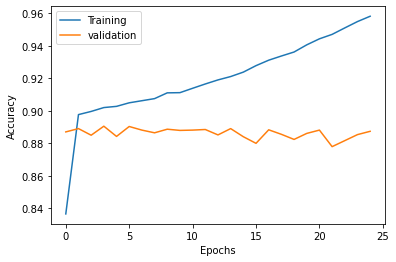

In [23]:
# Plot the training and validation accuracy

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [24]:
# plot confusion matrix
y_true = tf.concat([y for x, y in test_data], axis=0)

y_pred=model.predict_classes(test_data)
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat

C:\Users\danie\anaconda3\envs\ml\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[4693,   88],
       [ 513,  106]])

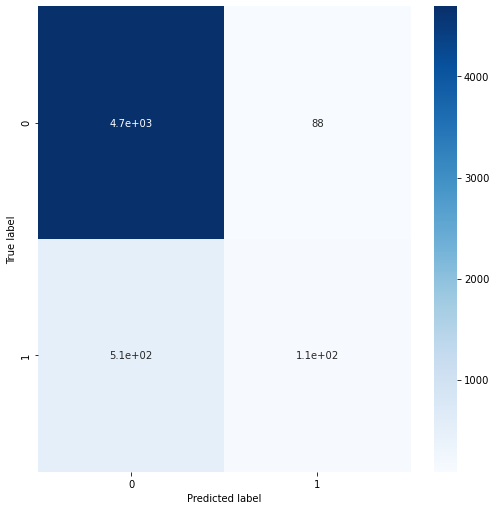

In [25]:
import seaborn as sns
figure = plt.figure(figsize=(7, 7))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()